In [2]:
!wget http://yellowstone.cs.ucla.edu/~muhao/pipr/SHS_ppi_beta.zip

--2023-05-13 11:46:45--  http://yellowstone.cs.ucla.edu/~muhao/pipr/SHS_ppi_beta.zip
Resolving yellowstone.cs.ucla.edu (yellowstone.cs.ucla.edu)... 131.179.64.145
Connecting to yellowstone.cs.ucla.edu (yellowstone.cs.ucla.edu)|131.179.64.145|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41211458 (39M) [application/zip]
Saving to: ‘SHS_ppi_beta.zip’

SHS_ppi_beta.zip    100%[===================>]  39.30M  3.37MB/s    in 12s     

2023-05-13 11:46:58 (3.28 MB/s) - ‘SHS_ppi_beta.zip’ saved [41211458/41211458]



In [3]:
!unzip SHS_ppi_beta.zip

Archive:  SHS_ppi_beta.zip
   creating: dataset_release/
  inflating: dataset_release/protein.actions.SHS148k.tsv  
  inflating: dataset_release/protein.actions.SHS27k.tsv  
  inflating: dataset_release/protein.sequences.dictionary.both.tsv  


In [6]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [68]:
import pandas as pd

shs148k_path = 'dataset_release/protein.actions.SHS148k.tsv'

In [69]:
shs148k = pd.read_csv(shs148k_path, sep='\t').reset_index()

shs148k.head()

,level_0,level_1,item_id_a,item_id_b,mode,action,is_directional,a_is_acting,score
0,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,ptmod,NaN,f,f,150
1,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,reaction,NaN,f,f,908
2,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,catalysis,NaN,t,t,908
3,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,inhibition,inhibition,t,t,154
4,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,binding,NaN,f,t,908


In [6]:
proteins = set(shs148k['item_id_a']) | set(shs148k['item_id_b']) 

In [7]:
proteins_index = {key: i for i, key in enumerate(proteins)}

In [8]:
shs148k['node_a'] = shs148k['item_id_a'].apply(lambda x: proteins_index[x])
shs148k['node_b'] = shs148k['item_id_b'].apply(lambda x: proteins_index[x])

In [9]:
shs148k = shs148k[shs148k['mode'] == 'binding']

In [10]:
shs148k.head()

,level_0,level_1,item_id_a,item_id_b,mode,action,is_directional,a_is_acting,score,node_a,node_b
4,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,binding,NaN,f,t,908,137,4634
8,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAA...,9606.ENSP00000000233,9606.ENSP00000265709,binding,NaN,f,f,908,137,4634
10,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,binding,NaN,f,t,156,137,1438
11,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQ...,9606.ENSP00000000233,9606.ENSP00000263025,binding,NaN,f,f,156,137,1438
21,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,MAGSSTGGGGVGETKVIYHLDEEETPYLVKIPVPAERITLGDFKSV...,9606.ENSP00000000233,9606.ENSP00000005340,binding,NaN,f,f,171,137,4882


In [11]:
import numpy as np

In [12]:
edges = np.array(shs148k[['node_a', 'node_b']])
np.random.shuffle(edges)
edges

array([[ 137, 1019],
       [ 877, 2146],
       [ 331, 4963],
       ...,
       [1635,  593],
       [2119,  524],
       [ 529,   91]])

In [13]:
np.savetxt("./data/ppi/SHS148all_binding.txt", edges, newline="\n", fmt="%d")


In [70]:
allseqs_path = 'dataset_release/protein.sequences.dictionary.both.tsv'

allseqs = pd.read_csv(allseqs_path, sep='\t', on_bad_lines='skip', names=["id", "seq"])
allseqs.head()

,id,seq
0,9606.ENSP00000000233,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...
1,9606.ENSP00000000412,MFPFYSCWRTGLLLLLLAVAVRESWQTEEKTCDLVGEKGKESEKEL...
2,9606.ENSP00000000442,MSSQVVGIEPLYIKAEPASPDSPKGSSETETEPPVALAPGPAPTRC...
3,9606.ENSP00000001008,MTAEEMKATESGAQSAPLPMEGVDISPKQDEGVLKVIKREGTGTEM...
4,9606.ENSP00000001146,MLFEGLDLVSALATLAACLVSVTLLLAVSQQLWQLRWAATRDKSCK...


In [15]:
allseqs['seq_len'] = allseqs['seq'].apply(lambda x: len(x))

In [16]:
allseqs['seq_len'].quantile(0.25)

242.0

In [13]:
allseqs[(allseqs['seq_len'] <= 750) & (allseqs['seq_len'] >= 250)]

,id,seq,seq_len
1,9606.ENSP00000000412,MFPFYSCWRTGLLLLLLAVAVRESWQTEEKTCDLVGEKGKESEKEL...,277
2,9606.ENSP00000000442,MSSQVVGIEPLYIKAEPASPDSPKGSSETETEPPVALAPGPAPTRC...,423
3,9606.ENSP00000001008,MTAEEMKATESGAQSAPLPMEGVDISPKQDEGVLKVIKREGTGTEM...,459
4,9606.ENSP00000001146,MLFEGLDLVSALATLAACLVSVTLLLAVSQQLWQLRWAATRDKSCK...,512
5,9606.ENSP00000002125,MSVLLRSGLGPLCAVARAAIPFIWRGKYFSSGNEPAENPVTPMLRH...,441
...,...,...,...
20438,9606.ENSP00000473092,TSCPRPLQEGTPGSRAAHALSRRGHRVHELPTSSPGGDTGFMSCPR...,308
20444,9606.ENSP00000473153,MTEKFLFLYLSLLPMPLLSQAQWNENSLVSFSKIIASGNHLSNCWI...,477
20449,9606.ENSP00000473172,MATVTATTKVPEIRDVTRIERIGAHSHIRGLGLDDALEPRQASQGM...,463
20451,9606.ENSP00000473193,MTSRGFQRSCNNPPCSSMTGRRANQIHHLTPDFSRELLPPKKAGTW...,336


In [17]:
id_seq_dict = pd.Series(allseqs.seq.values, index=allseqs.id).to_dict()

In [71]:
amino = ['A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(amino)
le.classes_


array(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'], dtype='<U1')

In [73]:
allseqs['seq_list'] = allseqs['seq'].apply(lambda x: le.transform(list(x)) + 1)
allseqs

,id,seq,seq_list
0,9606.ENSP00000000233,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,"[11, 6, 10, 17, 19, 16, 1, 10, 5, 16, 15, 8, 5..."
1,9606.ENSP00000000412,MFPFYSCWRTGLLLLLLAVAVRESWQTEEKTCDLVGEKGKESEKEL...,"[11, 5, 13, 5, 22, 16, 2, 20, 15, 17, 6, 10, 1..."
2,9606.ENSP00000000442,MSSQVVGIEPLYIKAEPASPDSPKGSSETETEPPVALAPGPAPTRC...,"[11, 16, 16, 14, 19, 19, 6, 8, 4, 13, 10, 22, ..."
3,9606.ENSP00000001008,MTAEEMKATESGAQSAPLPMEGVDISPKQDEGVLKVIKREGTGTEM...,"[11, 17, 1, 4, 4, 11, 9, 1, 17, 4, 16, 6, 1, 1..."
4,9606.ENSP00000001146,MLFEGLDLVSALATLAACLVSVTLLLAVSQQLWQLRWAATRDKSCK...,"[11, 10, 5, 4, 6, 10, 3, 10, 19, 16, 1, 10, 1,..."
...,...,...,...
20451,9606.ENSP00000473193,MTSRGFQRSCNNPPCSSMTGRRANQIHHLTPDFSRELLPPKKAGTW...,"[11, 17, 16, 15, 6, 5, 14, 15, 16, 2, 12, 12, ..."
20452,9606.ENSP00000473200,XNDLKAALDKIDQQYLNEIVGGQEPGEEDTQNDLKVHEENTTIEEL...,"[21, 12, 3, 10, 9, 1, 1, 10, 3, 9, 8, 3, 14, 1..."
20453,9606.ENSP00000473203,MQANDAGRFQAEFAEIRASKELSSGNMHCEYPYHQVCLCILFSEPK...,"[11, 14, 1, 12, 3, 1, 6, 15, 5, 14, 1, 4, 5, 1..."
20454,9606.ENSP00000473233,XGVAAYMKSEDPLFVLEHSLPIDTQYYLEQQLAKPLLRIFEPILGE...,"[21, 6, 19, 1, 1, 22, 11, 9, 16, 4, 3, 13, 10,..."


In [20]:
allseqs['seq_list'].apply(lambda x: len(x)).max()

33423

In [19]:
allseqs['seq_data'] = allseqs['seq_list'].apply(lambda x: list(x)[:100] if len(x) > 100 else list(x) + [0] * (100 - len(x)))
allseqs

,id,seq,seq_len,seq_list,seq_data
0,9606.ENSP00000000233,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,180,"[11, 6, 10, 17, 19, 16, 1, 10, 5, 16, 15, 8, 5...","[11, 6, 10, 17, 19, 16, 1, 10, 5, 16, 15, 8, 5..."
1,9606.ENSP00000000412,MFPFYSCWRTGLLLLLLAVAVRESWQTEEKTCDLVGEKGKESEKEL...,277,"[11, 5, 13, 5, 22, 16, 2, 20, 15, 17, 6, 10, 1...","[11, 5, 13, 5, 22, 16, 2, 20, 15, 17, 6, 10, 1..."
2,9606.ENSP00000000442,MSSQVVGIEPLYIKAEPASPDSPKGSSETETEPPVALAPGPAPTRC...,423,"[11, 16, 16, 14, 19, 19, 6, 8, 4, 13, 10, 22, ...","[11, 16, 16, 14, 19, 19, 6, 8, 4, 13, 10, 22, ..."
3,9606.ENSP00000001008,MTAEEMKATESGAQSAPLPMEGVDISPKQDEGVLKVIKREGTGTEM...,459,"[11, 17, 1, 4, 4, 11, 9, 1, 17, 4, 16, 6, 1, 1...","[11, 17, 1, 4, 4, 11, 9, 1, 17, 4, 16, 6, 1, 1..."
4,9606.ENSP00000001146,MLFEGLDLVSALATLAACLVSVTLLLAVSQQLWQLRWAATRDKSCK...,512,"[11, 10, 5, 4, 6, 10, 3, 10, 19, 16, 1, 10, 1,...","[11, 10, 5, 4, 6, 10, 3, 10, 19, 16, 1, 10, 1,..."
...,...,...,...,...,...
20451,9606.ENSP00000473193,MTSRGFQRSCNNPPCSSMTGRRANQIHHLTPDFSRELLPPKKAGTW...,336,"[11, 17, 16, 15, 6, 5, 14, 15, 16, 2, 12, 12, ...","[11, 17, 16, 15, 6, 5, 14, 15, 16, 2, 12, 12, ..."
20452,9606.ENSP00000473200,XNDLKAALDKIDQQYLNEIVGGQEPGEEDTQNDLKVHEENTTIEEL...,203,"[21, 12, 3, 10, 9, 1, 1, 10, 3, 9, 8, 3, 14, 1...","[21, 12, 3, 10, 9, 1, 1, 10, 3, 9, 8, 3, 14, 1..."
20453,9606.ENSP00000473203,MQANDAGRFQAEFAEIRASKELSSGNMHCEYPYHQVCLCILFSEPK...,125,"[11, 14, 1, 12, 3, 1, 6, 15, 5, 14, 1, 4, 5, 1...","[11, 14, 1, 12, 3, 1, 6, 15, 5, 14, 1, 4, 5, 1..."
20454,9606.ENSP00000473233,XGVAAYMKSEDPLFVLEHSLPIDTQYYLEQQLAKPLLRIFEPILGE...,397,"[21, 6, 19, 1, 1, 22, 11, 9, 16, 4, 3, 13, 10,...","[21, 6, 19, 1, 1, 22, 11, 9, 16, 4, 3, 13, 10,..."


In [21]:
shs148_seqs = allseqs[allseqs.id.isin(proteins_index.keys())].reset_index(drop=True)
shs148_seqs

,id,seq,seq_len,seq_list,seq_data
0,9606.ENSP00000000233,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...,180,"[11, 6, 10, 17, 19, 16, 1, 10, 5, 16, 15, 8, 5...","[11, 6, 10, 17, 19, 16, 1, 10, 5, 16, 15, 8, 5..."
1,9606.ENSP00000000412,MFPFYSCWRTGLLLLLLAVAVRESWQTEEKTCDLVGEKGKESEKEL...,277,"[11, 5, 13, 5, 22, 16, 2, 20, 15, 17, 6, 10, 1...","[11, 5, 13, 5, 22, 16, 2, 20, 15, 17, 6, 10, 1..."
2,9606.ENSP00000000442,MSSQVVGIEPLYIKAEPASPDSPKGSSETETEPPVALAPGPAPTRC...,423,"[11, 16, 16, 14, 19, 19, 6, 8, 4, 13, 10, 22, ...","[11, 16, 16, 14, 19, 19, 6, 8, 4, 13, 10, 22, ..."
3,9606.ENSP00000001008,MTAEEMKATESGAQSAPLPMEGVDISPKQDEGVLKVIKREGTGTEM...,459,"[11, 17, 1, 4, 4, 11, 9, 1, 17, 4, 16, 6, 1, 1...","[11, 17, 1, 4, 4, 11, 9, 1, 17, 4, 16, 6, 1, 1..."
4,9606.ENSP00000001146,MLFEGLDLVSALATLAACLVSVTLLLAVSQQLWQLRWAATRDKSCK...,512,"[11, 10, 5, 4, 6, 10, 3, 10, 19, 16, 1, 10, 1,...","[11, 10, 5, 4, 6, 10, 3, 10, 19, 16, 1, 10, 1,..."
...,...,...,...,...,...
5184,9606.ENSP00000319104,MSDFVESEAEESEEEYNDEGEVVPRVTKKFVEEEDDDEEEEEENLD...,1726,"[11, 16, 3, 5, 19, 4, 16, 4, 1, 4, 4, 16, 4, 4...","[11, 16, 3, 5, 19, 4, 16, 4, 1, 4, 4, 16, 4, 4..."
5185,9606.ENSP00000319118,MSRSFYVDSLIIKDTSRPAPSLPEPHPGPDFFIPLGMPPPLVMSVS...,304,"[11, 16, 15, 16, 5, 22, 19, 3, 16, 10, 8, 8, 9...","[11, 16, 15, 16, 5, 22, 19, 3, 16, 10, 8, 8, 9..."
5186,9606.ENSP00000319166,MKLGKVEFCHFLQLIALFLCFSGMSQAELSRSRSKPYFQSGRSRTK...,785,"[11, 9, 10, 6, 9, 19, 4, 5, 2, 7, 5, 10, 14, 1...","[11, 9, 10, 6, 9, 19, 4, 5, 2, 7, 5, 10, 14, 1..."
5187,9606.ENSP00000319169,MAAMAVGGAGGSRVSSGRDLNCVPEIADTLGAVAKQGFDFLCMPVF...,637,"[11, 1, 1, 11, 1, 19, 6, 6, 1, 6, 6, 16, 15, 1...","[11, 1, 1, 11, 1, 19, 6, 6, 1, 6, 6, 16, 15, 1..."


In [26]:
shs148_seqs['index'] = shs148_seqs['id'].apply(lambda x: proteins_index[x])
shs148_seqs = shs148_seqs.sort_values(by=['index'])

In [27]:
shs148_data = np.array(list(shs148_seqs['seq_data']))

In [28]:
np.save("./data/ppi/features_SHS148all.npy", shs148_data.astype("float"))

In [30]:
shs148_data.shape

(5189, 100)

In [3]:
features_SHS148all = np.load("./data/ppi/features_SHS148all.npy")

In [4]:
features_SHS148all

array([[11, 10,  6, ..., 22, 16, 16],
       [11, 16, 17, ...,  2,  6,  9],
       [11, 16,  9, ...,  4,  9,  6],
       ...,
       [11, 15,  6, ..., 10, 13,  6],
       [11,  9,  9, ...,  6,  6, 16],
       [11,  9,  6, ..., 16, 15,  4]])

In [143]:
import numpy as np

In [144]:
with open("./data/ppi/seqs_test.txt") as f:
    zdna = f.read().split('\n')

In [145]:
feature_func = lambda x: list(x)[:100] if len(x) > 100 else list(x) + [0] * (100 - len(x))
res = []
for elem in zdna:
    res.append(feature_func(le.transform(list(elem))))

In [146]:
np.array(res)

array([[10,  0,  3,  0, 15, 18,  2,  9,  5, 16,  5,  2, 11,  9,  3, 13,
         8,  7,  9, 13, 18,  9, 15,  2,  0,  5, 15, 12, 18, 13,  7,  2,
        13,  9,  9,  8,  8,  9, 13, 18, 12,  8,  8,  7,  9, 11, 13, 18,
         9, 21, 14,  9,  8,  8,  3,  5, 14, 18, 15, 15, 12,  0, 12,  0,
        16, 19, 15,  9,  5,  5,  2,  5,  0, 15,  5,  2,  5,  0, 12,  3,
         7, 12,  3,  2, 15,  0,  0, 13, 12, 15,  9,  3,  3, 14,  7,  9,
        14,  4,  9,  3],
       [10, 15, 15, 18,  8,  9, 19,  9, 11,  5,  0, 15, 15,  7, 15,  9,
        18,  5, 15,  3,  3,  9,  3, 11,  9,  5,  4, 18,  5,  8,  5,  5,
         4,  5,  0, 18,  4, 14,  0, 14,  6, 16,  0, 19, 11,  9,  2, 18,
         0, 18,  8,  7, 18, 11, 15,  8,  8,  7, 15, 14,  3, 18,  8,  0,
        10, 18, 11,  9, 14,  6,  3, 11, 18,  9,  9,  9,  9,  5, 18, 16,
         3, 11,  9,  3, 19,  2, 21, 18, 21,  5, 12,  0,  9, 18, 16,  5,
         4, 10,  3, 11],
       [10,  0,  5,  9, 21, 15,  9,  5, 18, 15, 18,  4, 15,  2, 13,  5,
         5, 14

In [147]:
test_features = np.array(res)[[0, 2]].astype("float")

In [148]:
np.save("./data/ppi_test/features_test.npy", test_features)

In [149]:
test = np.load("./data/ppi_test/features_test.npy")
test

array([[10.,  0.,  3.,  0., 15., 18.,  2.,  9.,  5., 16.,  5.,  2., 11.,
         9.,  3., 13.,  8.,  7.,  9., 13., 18.,  9., 15.,  2.,  0.,  5.,
        15., 12., 18., 13.,  7.,  2., 13.,  9.,  9.,  8.,  8.,  9., 13.,
        18., 12.,  8.,  8.,  7.,  9., 11., 13., 18.,  9., 21., 14.,  9.,
         8.,  8.,  3.,  5., 14., 18., 15., 15., 12.,  0., 12.,  0., 16.,
        19., 15.,  9.,  5.,  5.,  2.,  5.,  0., 15.,  5.,  2.,  5.,  0.,
        12.,  3.,  7., 12.,  3.,  2., 15.,  0.,  0., 13., 12., 15.,  9.,
         3.,  3., 14.,  7.,  9., 14.,  4.,  9.,  3.],
       [10.,  0.,  5.,  9., 21., 15.,  9.,  5., 18., 15., 18.,  4., 15.,
         2., 13.,  5.,  5., 14.,  8., 21., 10.,  3.,  2., 18., 16., 13.,
         7., 18., 18.,  3., 12.,  3., 12., 16.,  0.,  3.,  3.,  8., 12.,
        15., 12., 14., 14., 15.,  9., 15., 13., 12.,  9., 12., 12., 14.,
        12., 15., 12.,  0.,  0.,  9., 12.,  5.,  5.,  3., 18., 15.,  5.,
         8.,  5., 12.,  0., 18.,  0.,  0., 14.,  3.,  0., 14.,  2., 12

In [48]:
from torch.nn.modules.module import Module
from torch import Tensor
import torch

class FermiDiracDecoder(Module):
    def __init__(self, r, t):
        super(FermiDiracDecoder, self).__init__()
        self.r = r
        self.t = t

    def forward(self, dist):
        probs = 1. / (torch.exp((dist - self.r) / self.t) + 1.0)
        return probs

In [49]:
def sqdist(p1, p2, c):
    return (p1 - p2).pow(2).sum(dim=-1)
    
dc = FermiDiracDecoder(r=2.0, t=1.0)

def decode(emb_in, emb_out):
    dist = sqdist(Tensor(emb_in), Tensor(emb_out), 1.0)
    probs = dc.forward(dist)
    return probs

In [112]:
embs = np.load("/home/aleph0naught/GNN-PPI-diploma/logs/lp/2023_5_15/1/embeddings.npy")
embs

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05495378],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [132]:
np.random.shuffle(embs)

In [133]:
select = embs[:100]

In [134]:
res = []
for i, emb_in in enumerate(select):
    for j, emb_out in enumerate(select):
        if i != j:
            prob = decode(emb_in, emb_out)
            res.append(float(prob))


In [141]:
bins = []
for i in np.arange(0.5, 1., 0.02):
    bins.append(i) 
bins

[0.5,
 0.52,
 0.54,
 0.56,
 0.5800000000000001,
 0.6000000000000001,
 0.6200000000000001,
 0.6400000000000001,
 0.6600000000000001,
 0.6800000000000002,
 0.7000000000000002,
 0.7200000000000002,
 0.7400000000000002,
 0.7600000000000002,
 0.7800000000000002,
 0.8000000000000003,
 0.8200000000000003,
 0.8400000000000003,
 0.8600000000000003,
 0.8800000000000003,
 0.9000000000000004,
 0.9200000000000004,
 0.9400000000000004,
 0.9600000000000004,
 0.9800000000000004]

<AxesSubplot:>

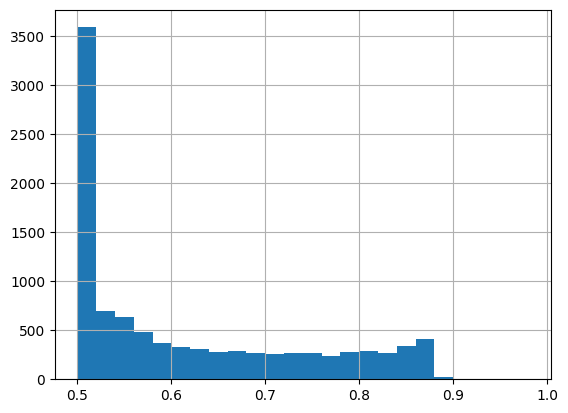

In [142]:
pd.Series(res).hist(bins=bins)